1. Importing necessary Python libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Creating the data frame

In [9]:
df = pd.read_csv("zomato-data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


3. Data Cleaning and Preparation

In [11]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [13]:
# Convert the rate column to float after removing / and the denominator.
def transform_rate(v):
    v=str(v).split('/')
    v=v[0]
    return float(v)

df['rate']=df['rate'].apply(transform_rate)
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [18]:
# Getting summary of the DataFrame.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [19]:
"""Conclusion: There is no null value in the DataFrame"""

'Conclusion: There is no null value in the DataFrame'

4. Exploring Restaurant Types

Text(0.5, 0, 'Types of Restaurant')

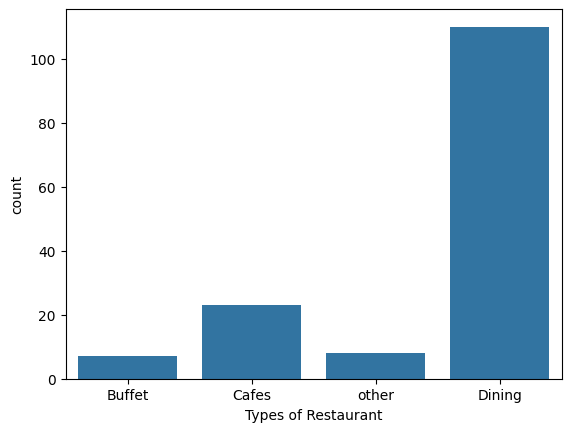

In [24]:
# Analyzing the listed_in(type) to identify the popular restaurant categories.

sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of Restaurant")

In [27]:
"""Conclusion : The majority of restaurants falls under Dining category."""

'Conclusion : The majority of restaurants falls under Dining category.'

In [ ]:
# Counted the number of votes by Restaurant Type
grouped_data=df.groupby('listed_in(type)')['votes'].sum() 
grouped_data
result=pd.DataFrame({'votes':grouped_data})
result  

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0.5, 1.0, 'Line Plot for Total number of votes per category')

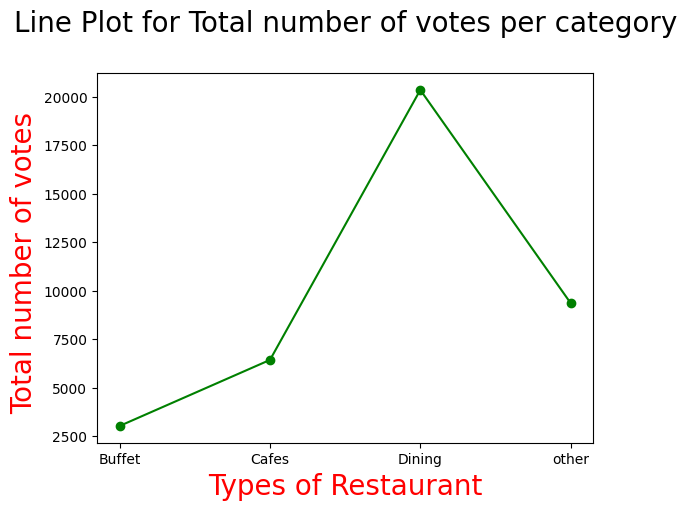

In [33]:
# Create a line plot for the result.
plt.plot(result,c='green',marker='o')
plt.xlabel('Types of Restaurant',c='red',size=20)
plt.ylabel('Total number of votes ',c='red',size=20)
plt.title('Line Plot for Total number of votes per category',size =20, pad =30)

In [35]:
"Conclusion: Dining Restaurants are preffered by a large number of individuals."

'Conclusion: Dining Restaurants are preffered by a large number of individuals.'

5. Identify the most voted restaurant.

In [40]:
# Find the restaurant with the highest number of votes.
max_votes=df['votes'].max()
restaurant_with_max_votes=df.loc[df['votes']==max_votes,'name']
restaurant_with_max_votes

38    Empire Restaurant
Name: name, dtype: object

6.Online Order Availability

<Axes: xlabel='online_order', ylabel='count'>

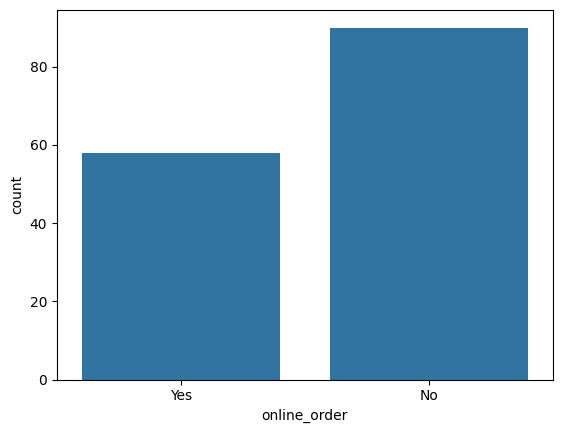

In [41]:
# Exploring the online_order column to see how many restaurants accept online.
sns.countplot(x=df['online_order'])


In [ ]:
"Conclusion: This suggests that a majority of restaurants do not accept onine orders."

'Conclusion: This suggests that a majority f restaurants do not accept onine orders.'

7. Analyze Rating

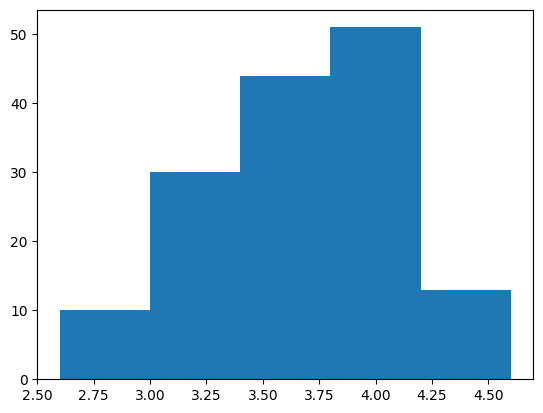

In [43]:
plt.hist(df['rate'], bins=5)
plt.title ='Rating_Distribution'
plt.show()

In [44]:
"Conclusion:Majority of restaurants rrecieved ratings ranging from 3.5 to 4.5"

'Conclusion:Majority of restaurants rrecieved ratings ranging from 3.5 to 4.5'

8. Approximate cost for couples.  



<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

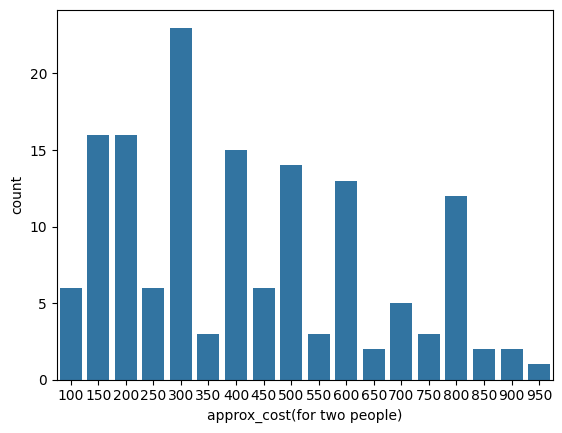

In [48]:
# Analyzethe approx_cost (for two people) column to find the preffered price range.

couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [49]:
"Conclusion: The majority of couples prefer restaurant with an approximate cost of 300 rupees"

'Conclusion: The majority of couples prefer restaurant with an approximate cost of 300 rupees'

9. Rating Comparisions - Online Vs Offline Orders

<Axes: xlabel='online_order', ylabel='rate'>

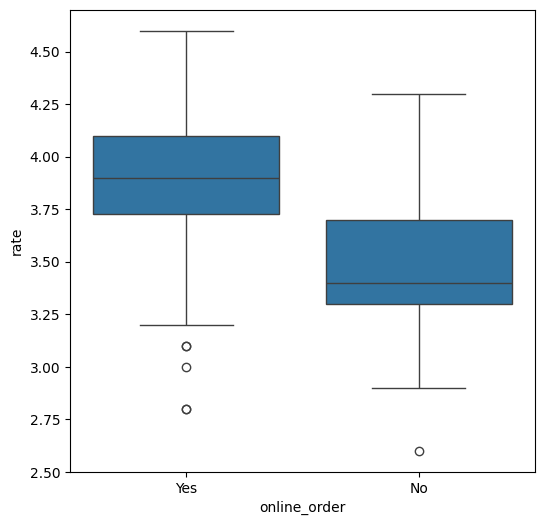

In [50]:
# Compare Rating of Restaurants that accept online order and those that don't.
plt.figure (figsize=(6,6))
sns.boxplot(x='online_order',y='rate', data =df)

In [51]:
"""Offline orders recieved lower rating in comparision to online 
   orders which obtained excellent rating."""

'Offline orders recieved lower rating in comparision to online \n   orders which obtained excellent rating.'

10. Order Mode Preferences by Restaurant Type

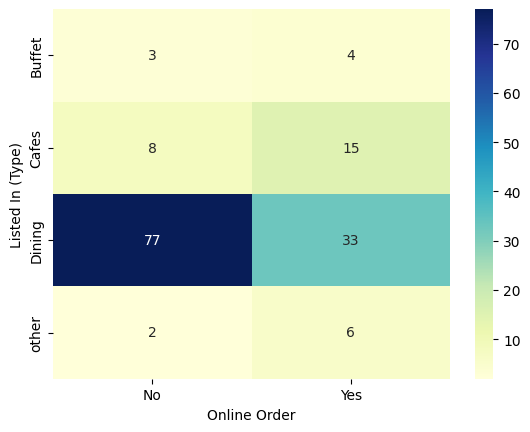

In [ ]:

# Find the relationship between order mode(online_order) and restaurant type(listed_in(type)).

pivot_table =df.pivot_table(
index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()